In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('loan_data.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


<AxesSubplot:>

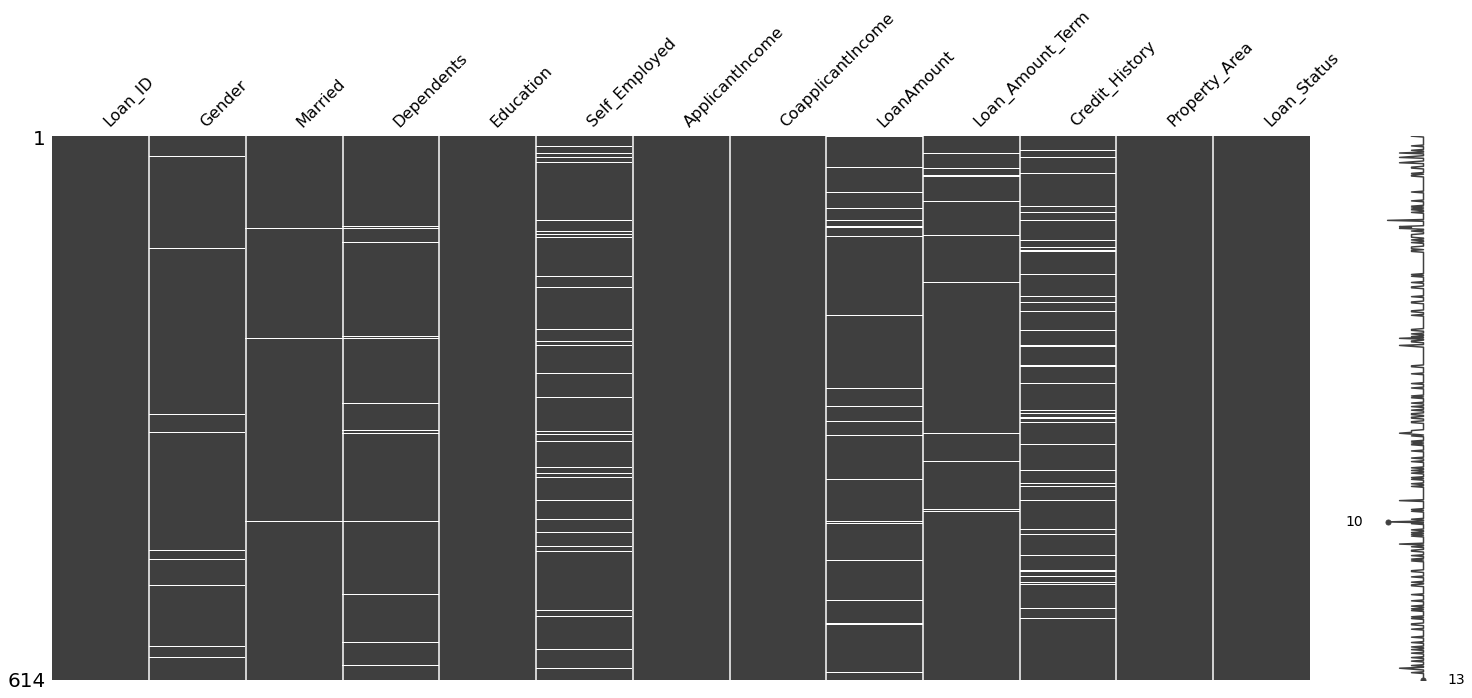

In [3]:
# check the missing value
import missingno as msno
msno.matrix(df) # or you can use .info

In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# as long as we have few missing values better to drop them
df = df.dropna()
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

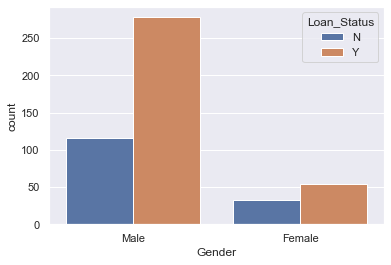

In [7]:
sns.set()
# graph count of male vs female who get the loan
sns.countplot(data=df, x='Gender', hue='Loan_Status')

# Proccessing 

In [8]:
df = df.replace(to_replace='3+', value=4)
df.replace({'Loan_Status': {'Y': 1, 'N': 0}}, inplace=True)

In [9]:
df.replace({
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 1},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}    
}, inplace=True)

In [10]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0


# Split trian test

In [11]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

In [13]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

all_scores = pd.DataFrame(np.zeros((len(models), 3)))
all_scores.columns = ['train_score', 'test_score', 'new_input']
all_scores.index = [name for name, model in models]

train_score_acc = []
test_score_acc = []
newInputTested = []

def tester_func():
    newInput = (1, 1, 2, 1, 0, 7583, 0.0, 187.0, 360.0, 1.0, 2) # this is 1 meaning did get loan
    #newInput = (0, 0, 0, 1, 1, 4583, 0.0, 133.0, 360.0, 0.0, 1) # this is 0 meaning did not get loan
    newInput = np.asarray(newInput)
    print(len(newInput))
    newInput = newInput.reshape(1, -1)
    print(newInput)
    return newInput

for name, model in models:
    model.fit(X_train, y_train)
    
    xtrainpred = model.predict(X_train)
    xtrainaccu = accuracy_score(y_train, xtrainpred)

    xtestpred = model.predict(X_test)
    xtestaccu = accuracy_score(y_test, xtestpred)
    
    train_score_acc.append(round(xtrainaccu, 3))
    test_score_acc.append(round(xtestaccu, 3))
    
    newInputTested.append(model.predict(tester_func()))
    
all_scores['train_score'] = train_score_acc
all_scores['test_score'] = test_score_acc
all_scores['new_input'] = newInputTested

all_scores

11
[[1.000e+00 1.000e+00 2.000e+00 1.000e+00 0.000e+00 7.583e+03 0.000e+00
  1.870e+02 3.600e+02 1.000e+00 2.000e+00]]
11
[[1.000e+00 1.000e+00 2.000e+00 1.000e+00 0.000e+00 7.583e+03 0.000e+00
  1.870e+02 3.600e+02 1.000e+00 2.000e+00]]
11
[[1.000e+00 1.000e+00 2.000e+00 1.000e+00 0.000e+00 7.583e+03 0.000e+00
  1.870e+02 3.600e+02 1.000e+00 2.000e+00]]


/Users/tesfalemhaile/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,train_score,test_score,new_input
LR,0.801,0.833,[1]
KNN,0.743,0.667,[1]
SVM,0.701,0.688,[1]
